<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Dataset-Information" data-toc-modified-id="Dataset-Information-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dataset Information</a></span></li></ul></li><li><span><a href="#Research-Question:" data-toc-modified-id="Research-Question:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Research Question:</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Data-Visualizations" data-toc-modified-id="Data-Visualizations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Data Visualizations</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Main-Label" data-toc-modified-id="Main-Label-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Main Label</a></span></li><li><span><a href="#Location-Label" data-toc-modified-id="Location-Label-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Location Label</a></span></li><li><span><a href="#Secondary-Label" data-toc-modified-id="Secondary-Label-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Secondary Label</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

So, here is the deliverable: Prepare a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

A specified research question your model addresses
How you chose your model specification and what alternatives you compared it to
The practical uses of your model for an audience of interest
Any weak points or shortcomings of your model

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn import ensemble

import operator
import os


%matplotlib inline

# Options for pandas
pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

In [2]:
user1 = pd.read_csv('data/user1.features_labels.csv')
user2 = pd.read_csv('data/user2.features_labels.csv')
master_df = pd.read_csv('data/master_df.csv')

In [3]:
directory = os.fsencode('data/')
master_df = pd.DataFrame()

for i,file in enumerate(os.listdir(directory)):
    filename = os.fsdecode(file)
    if filename.endswith(".gz"): 
        user = pd.read_csv('data/' + filename)
        user['user_num'] = i
        master_df = master_df.append(user)
master_df.to_csv('data/master_df.csv')

# EDA

## Dataset Information

The are 60 participants within this [kaggle dataset](https://www.kaggle.com/yvaizman/the-extrasensory-dataset#user2.features_labels.csv) (34 females and 26 males). Majoirity of participants are UCSD undergraduate and graduate students and research assistants. The average number of days users participated was 7.6 days (std: 3.2). 

The data from each user was collected by a mobile app called ExtraSensory. The majority of the data was collected by built-in sensors within the user's phone and provided smart watches. The sensor data was collected in a 20 second window with intervals of one minute and some time gaps in between. The sensors range from movement sensors such as accelorometer, gyrometer and magnetometer to audio and location sensors. There are missing observations within some sensor columns such as location and audio because of user's personal privacy reasons. Additional binary information from the app was self-reported by the user such as wifi available and time of day. 
 
The user also self-reported what activity they were doing or what location they were at within the recorded timeframe. The user was able to choose from general movement activities (e.g. lying down, sitting, standing in place, walking, or running), specific movement acitivies (e.g. eating, texting or exercising) or general location (e.g. gym, workplace, or home). 

As stated before, majority of the dataframe consist of sensor data. There are different metrics calculated in relation to each sensor such as: mean, median, std, etc.

Sensor Definitions:
    - Accelorometer: Measures magnitude and direction of acceleration (rate of velocity change)
    - Gyrometer: Measure angular velocity (change in rotational angle)
    - Magnetometer: Measure magnitude and direction of magnetic field 
    


# Research Question:

Which classification model has the highest accuracy in regards to predicting multi-class behavioral labels?

## Data Cleaning

In [ ]:
#Use linear interpolate with grouped label?

In [7]:
# general function used to clean dataframes. 

def clean_df(df, main_labels, loc_labels, secondary_labels, interpolate='linear'):
    
    label_col = [col for col in list(df.columns) if col[:6] == 'label:']
    
    for col in label_col:
        df[col].fillna(0, axis=0, inplace=True)

    #drop observations with no labels
    no_label_index = list(df[df[label_col].eq(0).all(1)].index)

    df.drop(df.index[no_label_index], axis=0, inplace=True)

    #drop all columns where all observations are nans
    drop_col = df.loc[:, df.isnull().sum()/df.isnull().count()*100 == 100].columns
    df.drop(drop_col, axis=1, inplace=True)
    
    #interpolate
    nan_col = [col for col in list(df.columns) if df[col].isnull().sum()/df[col].isnull().count()*100 > 0]

    for col in nan_col:
        df[col].interpolate(method='linear', limit_direction='both', inplace=True)
    
    #dictionary that separates labels by categories
    label_dict = {'main_label': main_labels, 'loc_label': loc_labels, 'secondary_label': secondary_labels}
    
    #finds labels that fall under each label category above and adds it to new column relating to label category.
    for label, lst in label_dict.items():
        #init dict
        df_label_dict = {i: '' for i in range(len(df))}
        # add labels to dict if labels is present in respective index
        for i in range(len(df)):
            for col in lst:
                if df[col].iloc[i] == 1:
                    #creates multiclass label
                    df_label_dict[i] += col + ' '
        df[label] = pd.Series(df_label_dict).apply(lambda x: x if x != '' else np.NaN)
    
    return df

Define end goal/application to help narrow down labels 
Outline:

Train RF on master df to recommend possible labels to user
User creaes own personalized data overtime with correct labels (already done with given data)

train model with all features but also include time spent already doing the activity. Essentially making each observation dependent on previous observations. Use weights? or new time feature?

if time > average time spent doing activity then decrease probability of doing the activity
if time < average time spent doing activity then increase proabbility

Future Application:

Model is able to predict the time range a person will spend on an activity. Incorporate more data such as schedule, health data (diet, sleep, heart rate, phone use), weather, etc.


In [9]:
label_col = label_col = [col for col in list(user1.columns) if col[:6] == 'label:']

main_labels = ['label:LYING_DOWN', 'label:SITTING', 'label:FIX_running', 'label:OR_standing','label:SLEEPING', 
               'label:FIX_walking']

loc_labels = ['label:LAB_WORK', 'label:IN_CLASS', 'label:IN_A_MEETING', 'label:LOC_main_workplace','label:OR_indoors',
 'label:OR_outside', 'label:IN_A_CAR', 'label:ON_A_BUS', 'label:LOC_home', 'label:FIX_restaurant','label:SHOPPING',
'label:AT_A_PARTY', 'label:AT_A_BAR', 'label:LOC_beach', 'label:AT_THE_GYM', 'label:ELEVATOR', 'label:AT_SCHOOL']

not_secondary_labels = main_labels + loc_labels
secondary_labels = [col for col in label_col if col not in not_secondary_labels]

user2 = clean_df(user2, main_labels, loc_labels, secondary_labels)
master_df = clean_df(master_df.sample(frac=.1), main_labels, loc_labels, secondary_labels)

## Data Visualizations


add color map for main_labels

show visualization that shows which variables correlate to label
color plot by label - scatter
violin plot withe each plot being for one sensor or vice versa

/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


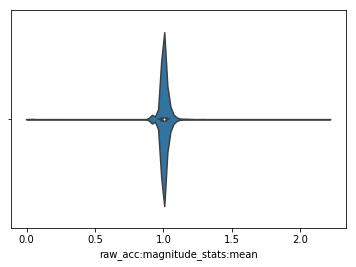

In [54]:
sns.violinplot(master_df['raw_acc:magnitude_stats:mean'][master_df['main_label'] == 'label:SITTING '].dropna())

raw_acc:magnitude_stats:mean
label:LYING_DOWN
Series([], Name: raw_acc:magnitude_stats:mean, dtype: float64)


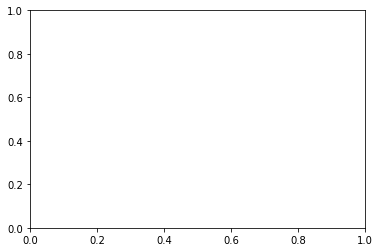

raw_acc:magnitude_stats:mean
label:SITTING
Series([], Name: raw_acc:magnitude_stats:mean, dtype: float64)


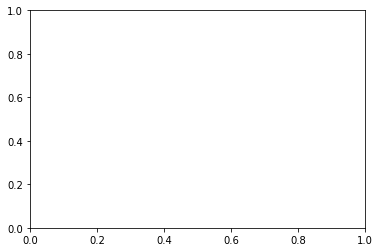

raw_acc:magnitude_stats:mean
label:FIX_running
Series([], Name: raw_acc:magnitude_stats:mean, dtype: float64)


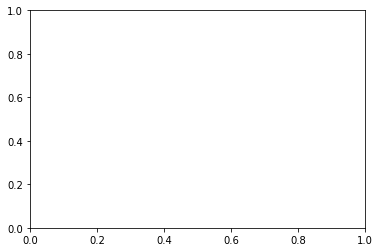

raw_acc:magnitude_stats:mean
label:OR_standing
Series([], Name: raw_acc:magnitude_stats:mean, dtype: float64)


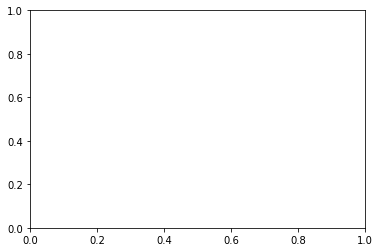

raw_acc:magnitude_stats:mean
label:SLEEPING
Series([], Name: raw_acc:magnitude_stats:mean, dtype: float64)


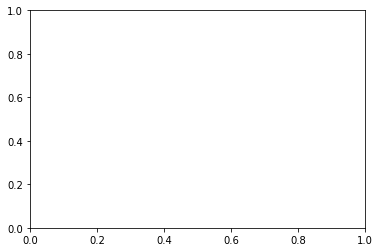

raw_acc:magnitude_stats:mean
label:FIX_walking
Series([], Name: raw_acc:magnitude_stats:mean, dtype: float64)


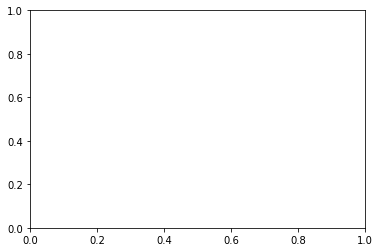

raw_acc:magnitude_stats:std
label:LYING_DOWN
Series([], Name: raw_acc:magnitude_stats:std, dtype: float64)


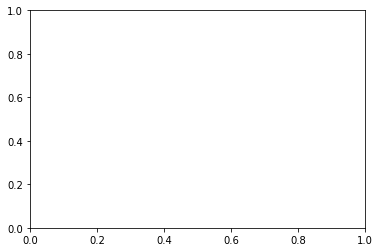

raw_acc:magnitude_stats:std
label:SITTING
Series([], Name: raw_acc:magnitude_stats:std, dtype: float64)


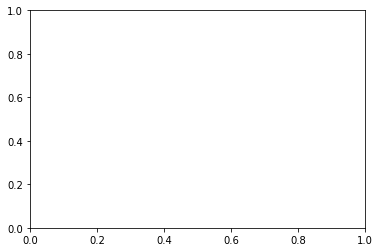

raw_acc:magnitude_stats:std
label:FIX_running
Series([], Name: raw_acc:magnitude_stats:std, dtype: float64)


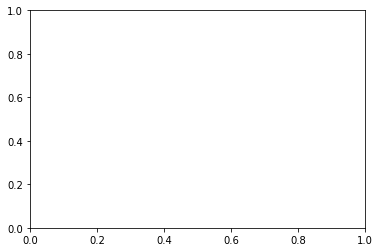

raw_acc:magnitude_stats:std
label:OR_standing
Series([], Name: raw_acc:magnitude_stats:std, dtype: float64)


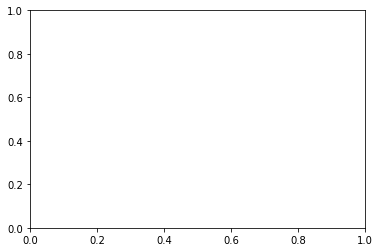

raw_acc:magnitude_stats:std
label:SLEEPING
Series([], Name: raw_acc:magnitude_stats:std, dtype: float64)


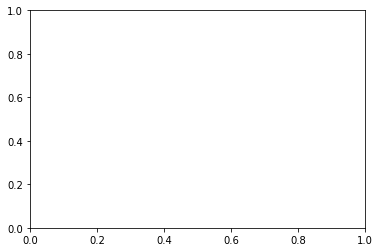

raw_acc:magnitude_stats:std
label:FIX_walking
Series([], Name: raw_acc:magnitude_stats:std, dtype: float64)


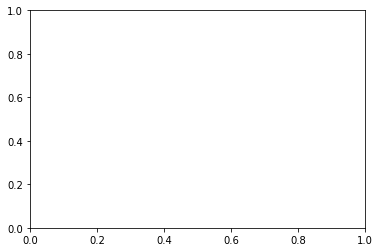

proc_gyro:magnitude_stats:mean
label:LYING_DOWN
Series([], Name: proc_gyro:magnitude_stats:mean, dtype: float64)


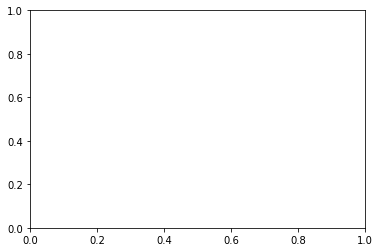

proc_gyro:magnitude_stats:mean
label:SITTING
Series([], Name: proc_gyro:magnitude_stats:mean, dtype: float64)


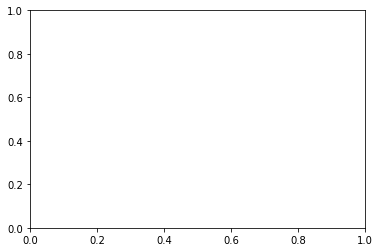

proc_gyro:magnitude_stats:mean
label:FIX_running
Series([], Name: proc_gyro:magnitude_stats:mean, dtype: float64)


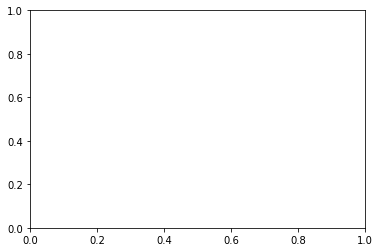

proc_gyro:magnitude_stats:mean
label:OR_standing
Series([], Name: proc_gyro:magnitude_stats:mean, dtype: float64)


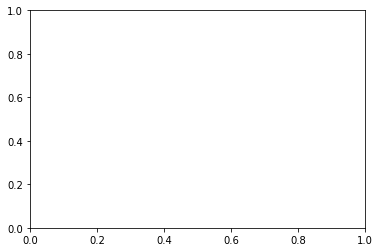

proc_gyro:magnitude_stats:mean
label:SLEEPING
Series([], Name: proc_gyro:magnitude_stats:mean, dtype: float64)


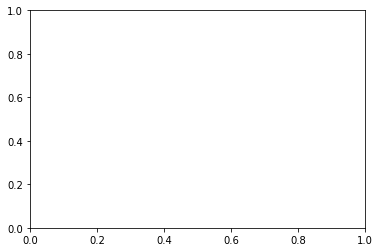

proc_gyro:magnitude_stats:mean
label:FIX_walking
Series([], Name: proc_gyro:magnitude_stats:mean, dtype: float64)


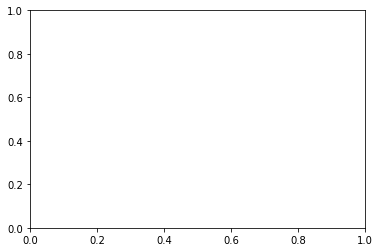

proc_gyro:magnitude_stats:std
label:LYING_DOWN
Series([], Name: proc_gyro:magnitude_stats:std, dtype: float64)


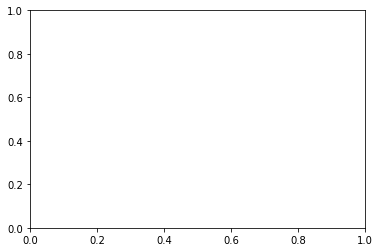

proc_gyro:magnitude_stats:std
label:SITTING
Series([], Name: proc_gyro:magnitude_stats:std, dtype: float64)


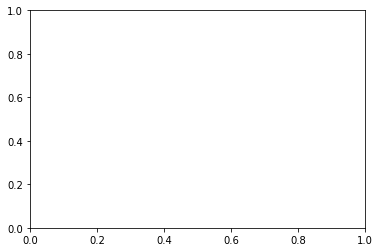

proc_gyro:magnitude_stats:std
label:FIX_running
Series([], Name: proc_gyro:magnitude_stats:std, dtype: float64)


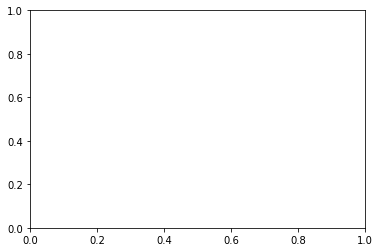

proc_gyro:magnitude_stats:std
label:OR_standing
Series([], Name: proc_gyro:magnitude_stats:std, dtype: float64)


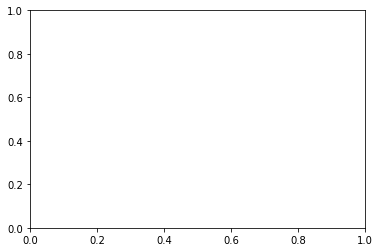

proc_gyro:magnitude_stats:std
label:SLEEPING
Series([], Name: proc_gyro:magnitude_stats:std, dtype: float64)


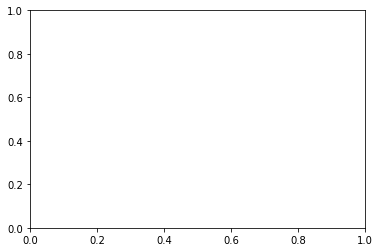

proc_gyro:magnitude_stats:std
label:FIX_walking
Series([], Name: proc_gyro:magnitude_stats:std, dtype: float64)


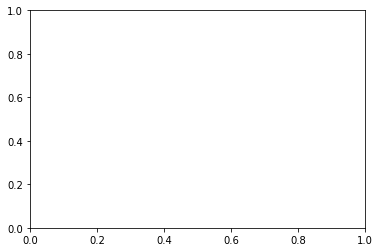

raw_magnet:magnitude_stats:mean
label:LYING_DOWN
Series([], Name: raw_magnet:magnitude_stats:mean, dtype: float64)


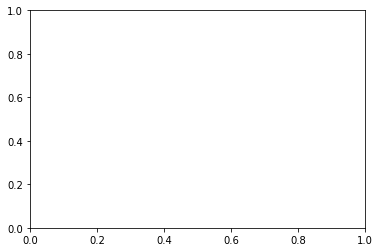

raw_magnet:magnitude_stats:mean
label:SITTING
Series([], Name: raw_magnet:magnitude_stats:mean, dtype: float64)


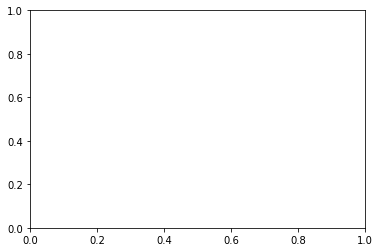

raw_magnet:magnitude_stats:mean
label:FIX_running
Series([], Name: raw_magnet:magnitude_stats:mean, dtype: float64)


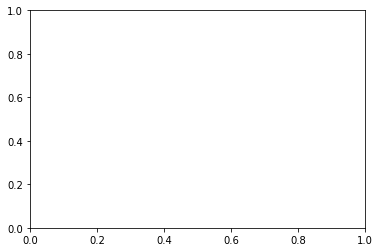

raw_magnet:magnitude_stats:mean
label:OR_standing
Series([], Name: raw_magnet:magnitude_stats:mean, dtype: float64)


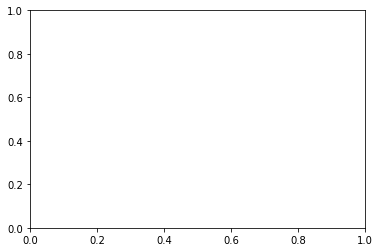

raw_magnet:magnitude_stats:mean
label:SLEEPING
Series([], Name: raw_magnet:magnitude_stats:mean, dtype: float64)


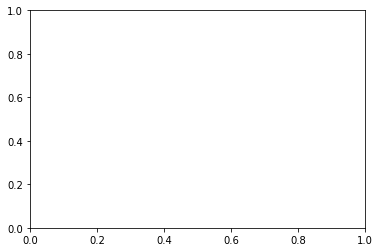

raw_magnet:magnitude_stats:mean
label:FIX_walking
Series([], Name: raw_magnet:magnitude_stats:mean, dtype: float64)


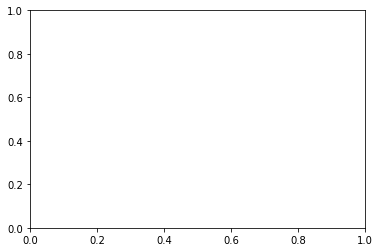

raw_magnet:magnitude_stats:std
label:LYING_DOWN
Series([], Name: raw_magnet:magnitude_stats:std, dtype: float64)


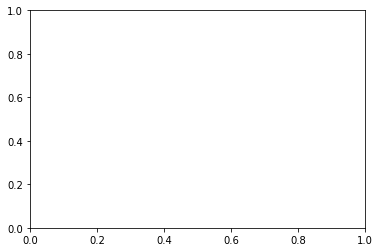

raw_magnet:magnitude_stats:std
label:SITTING
Series([], Name: raw_magnet:magnitude_stats:std, dtype: float64)


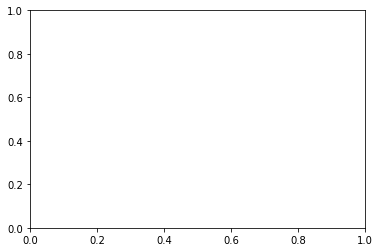

raw_magnet:magnitude_stats:std
label:FIX_running
Series([], Name: raw_magnet:magnitude_stats:std, dtype: float64)


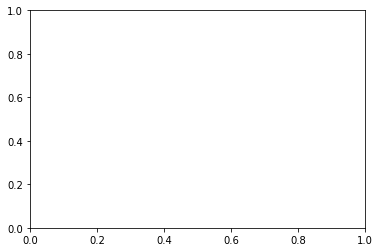

raw_magnet:magnitude_stats:std
label:OR_standing
Series([], Name: raw_magnet:magnitude_stats:std, dtype: float64)


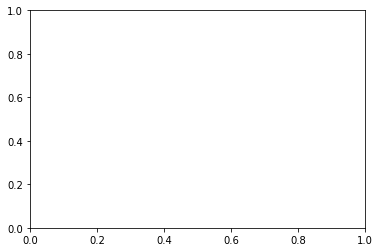

raw_magnet:magnitude_stats:std
label:SLEEPING
Series([], Name: raw_magnet:magnitude_stats:std, dtype: float64)


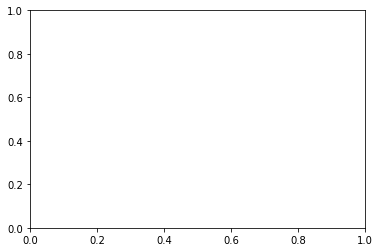

raw_magnet:magnitude_stats:std
label:FIX_walking
Series([], Name: raw_magnet:magnitude_stats:std, dtype: float64)


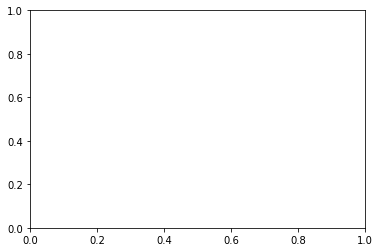

watch_acceleration:magnitude_stats:mean
label:LYING_DOWN
Series([], Name: watch_acceleration:magnitude_stats:mean, dtype: float64)


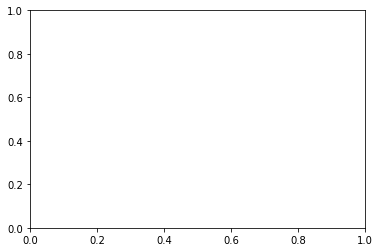

watch_acceleration:magnitude_stats:mean
label:SITTING
Series([], Name: watch_acceleration:magnitude_stats:mean, dtype: float64)


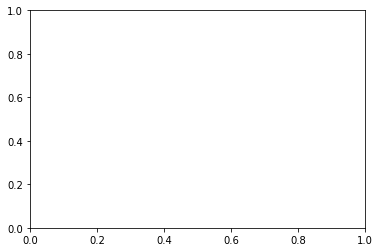

watch_acceleration:magnitude_stats:mean
label:FIX_running
Series([], Name: watch_acceleration:magnitude_stats:mean, dtype: float64)


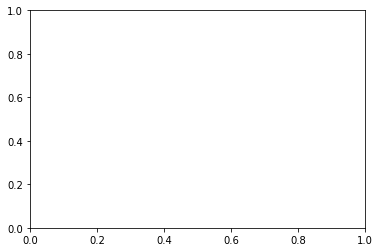

watch_acceleration:magnitude_stats:mean
label:OR_standing
Series([], Name: watch_acceleration:magnitude_stats:mean, dtype: float64)


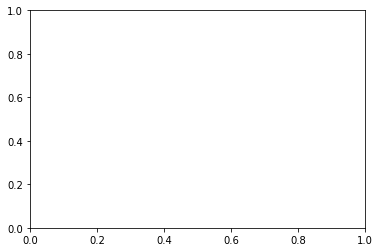

watch_acceleration:magnitude_stats:mean
label:SLEEPING
Series([], Name: watch_acceleration:magnitude_stats:mean, dtype: float64)


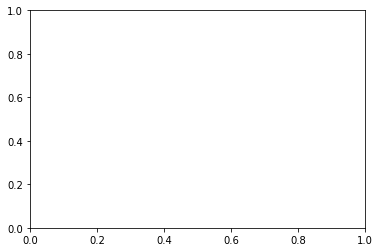

watch_acceleration:magnitude_stats:mean
label:FIX_walking
Series([], Name: watch_acceleration:magnitude_stats:mean, dtype: float64)


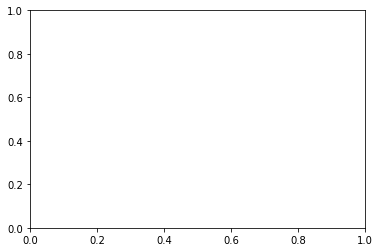

watch_acceleration:magnitude_stats:std
label:LYING_DOWN
Series([], Name: watch_acceleration:magnitude_stats:std, dtype: float64)


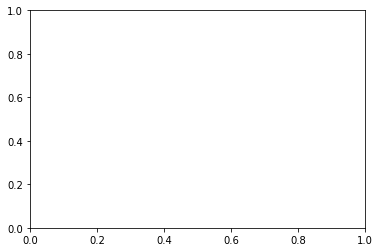

watch_acceleration:magnitude_stats:std
label:SITTING
Series([], Name: watch_acceleration:magnitude_stats:std, dtype: float64)


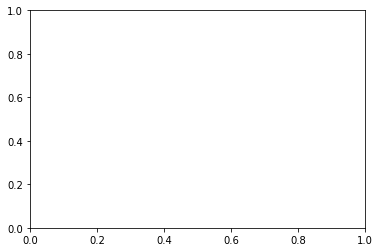

watch_acceleration:magnitude_stats:std
label:FIX_running
Series([], Name: watch_acceleration:magnitude_stats:std, dtype: float64)


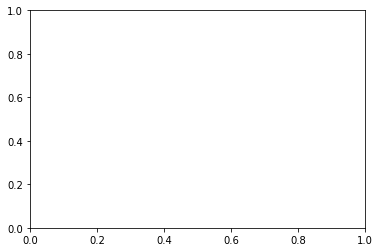

watch_acceleration:magnitude_stats:std
label:OR_standing
Series([], Name: watch_acceleration:magnitude_stats:std, dtype: float64)


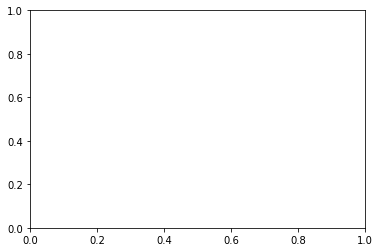

watch_acceleration:magnitude_stats:std
label:SLEEPING
Series([], Name: watch_acceleration:magnitude_stats:std, dtype: float64)


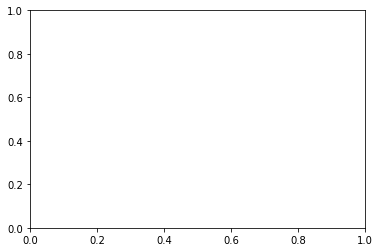

watch_acceleration:magnitude_stats:std
label:FIX_walking
Series([], Name: watch_acceleration:magnitude_stats:std, dtype: float64)


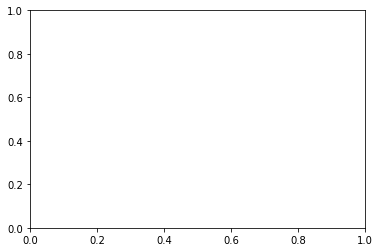

In [51]:
plot_feature_list = [col for col in list(master_df.columns) if (col[-3:] == 'std' or col[-4:] == 'mean') and col[:3] != 'aud']

for col in plot_feature_list:
    for label in main_labels:
        plot_data = master_df[col][master_df['main_label'] == label].dropna()
        print(plot_data)
        try:
            plt.violinplot(plot_data)
        except ValueError:
            pass
        plt.show()



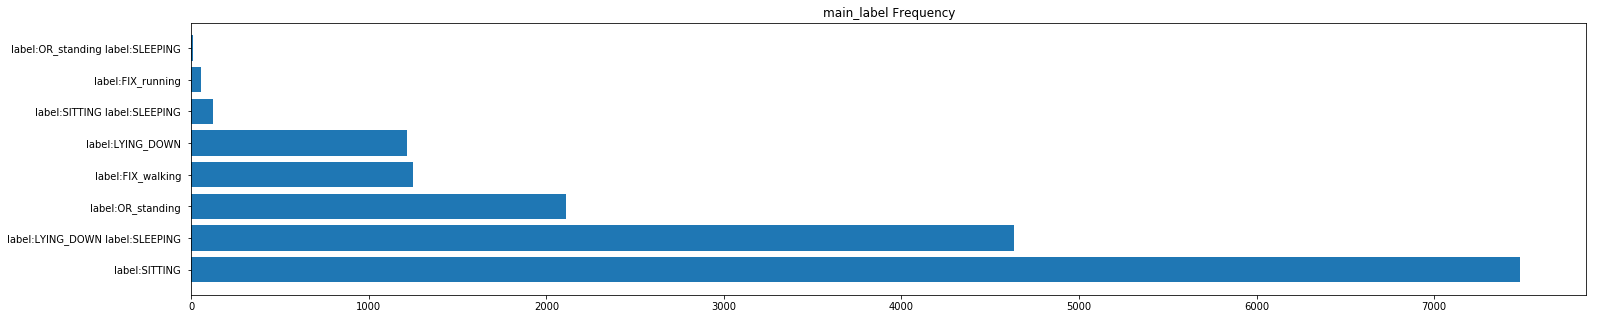

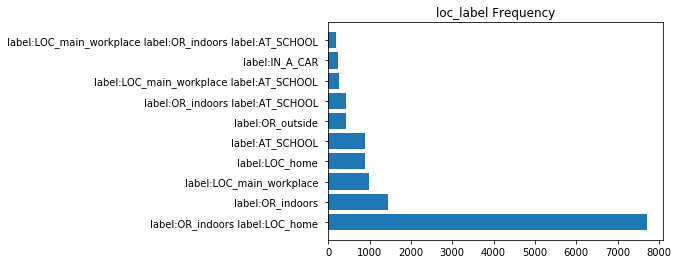

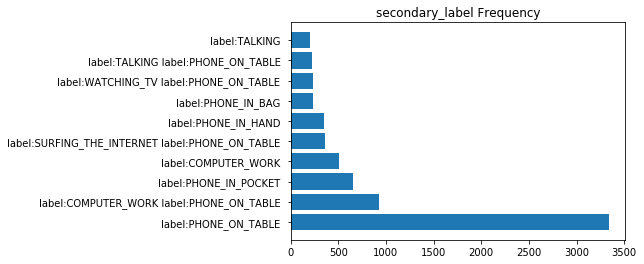

In [65]:
label_list = ['main_label', 'loc_label', 'secondary_label']
plt.figure(figsize=(25,5))
for i,label in enumerate(label_list):
    label_freq = master_df[label].value_counts()[:10]
    plt.barh(label_freq.index, label_freq.values)
    plt.title('{} Frequency'.format(label))
    plt.show()

# Modeling

In [81]:
knn_model_dict = {}
dt_model_dict = {}
rfc_model_dict = {}

In [77]:
def best_k(max_k, data, feature_list, label):
    score_dict = {}
    best_score = 0
    best_k = 0 
    for i in range(1,max_k):
        model = KNeighborsClassifier(n_neighbors=i)
        train_x, test_x, train_y, test_y = train_test_split(data[feature_list], data[label], test_size=.3)
        model.fit(train_x, train_y)
        score = model.score(test_x, test_y)
        score_dict[i] = score
        if (i != 1) and (score > best_score):
            best_score = score
            best_k = i
    return best_k

In [176]:
not_features_list = label_col + ['timestamp', 'label_source', 'main_label', 'loc_label', 'secondary_label', 'timestamp' ]
all_feature_list = [col for col in list(user2.columns) if col not in not_features_list]

def predict_label(user, model_dict, feature_list, label, label_input=False):
    data = user[user[label] != '']
    data = data.dropna(subset=[label])

    train_x, test_x, train_y, test_y = train_test_split(data[feature_list], data[label], test_size=.3)
    
    for name,model in model_dict.items():
        model.fit(train_x, train_y)
        score = model.score(test_x, test_y)
        print('{} accuracy: {}'.format(name, score))
    
        return model_dict



## Main Label

In [96]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=100)
k = best_k(50, main_data, all_feature_list, 'main_label')
knn = KNeighborsClassifier(n_neighbors=k)
rfc = ensemble.RandomForestClassifier()
model_dict = {'knn': knn, 'dt': dt, 'rfc': rfc}

main_model_dict = predict_label(user2, model_dict, all_feature_list, 'main_label')

knn accuracy: 0.7675250357653791
dt accuracy: 0.796137339055794


/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rfc accuracy: 0.9148783977110158


## Location Label

In [94]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=100)
k = best_k(50, main_data, all_feature_list, 'main_label')
knn = KNeighborsClassifier(n_neighbors=k)
rfc = ensemble.RandomForestClassifier()
model_dict = {'knn': knn, 'dt': dt, 'rfc': rfc}

location_model_dict = predict_label(user2, model_dict, all_feature_list, 'loc_label')

knn accuracy: 0.7561615102254851
dt accuracy: 0.7000524383848977


/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rfc accuracy: 0.9087572102779234


## Secondary Label

In [97]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=100)
k = best_k(50, main_data, all_feature_list, 'secondary_label')
knn = KNeighborsClassifier(n_neighbors=k)
rfc = ensemble.RandomForestClassifier()
model_dict = {'knn': knn, 'dt': dt, 'rfc': rfc}

secondary_model_dict = predict_label(master_df, model_dict, all_feature_list, 'secondary_label')

knn accuracy: 0.7192094245935158
dt accuracy: 0.6530036023756207


/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


rfc accuracy: 0.8690487781131341


In [177]:
master_main_loc_labels, stacked_secondary_model_dict = predict_label(master_df, model_dict, all_feature_list, 'secondary_label', label_input=True)

knn accuracy: 0.8082952000778892
dt accuracy: 0.8144289747833706
rfc accuracy: 0.8245545711225781


# Conclusion